# Prerequisites for execution

In [ ]:
!pip install kora -q
!pip install PCA
!pip install pingouin

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 59 kB 5.4 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=609e1d7efa46e3d9d43b11dfa5f798ebf60b597ee3894a2bdb8882c78798aa66
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 183 kB 5.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.9 MB/s 
     |████████████████████████████████| 9.8 MB 26.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=351963f31345097566f487556594925bc90d0a83015aec87dda9ebea41baaef5
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=f307a70159f9fec1458e9578d7c774d3d320aed1d95023748e180c697d07820d
  Stored in director

# Imports for project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, shapiro, mannwhitneyu, kruskal
import scipy.stats
import pingouin as png
from pingouin import mwu, kruskal
import seaborn as sns

import os
import math

from matplotlib.pyplot import figure

# Define execution environment

In [ ]:
#Red pill or blue pill

is_drive = False
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"

while True:
  offon = input("Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): ")
  try:
    if offon.lower() not in ["y", "n"]:
      raise ValueError
    else:
      if offon.lower() == "n":
        from google.colab import drive
        from kora import drive as drives
        drive.mount('/content/drive')
        is_drive = True
        cwd = str(drives.chdir_notebook())
        cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Datasets/"
      break
  except ValueError:
    print("Error! Please only type one of the following: Y, y, N, n")

Is this being run offline? (Y = offline (i.e. Jupyter notebook), N = online (i.e. Google Colab notebook)): n
Mounted at /content/drive


In [ ]:
cwd

'/content/drive/My Drive/CCT/Assignments/Assignment 2/Datasets/'

# Import datasets

In [ ]:
df1 = pd.read_csv(cwd+"milk dataset 2.csv")
dfn = pd.read_csv(cwd+"netherlands dataset output.csv")

# Evaluation of dataset

## Variables to consider

### Average raw value of milk

This statistic determines the average value of the milk produced in Ireland, averaging the domestic pricing of the milk as well as the price used for export of the milk to other EU countries.

# Process dataset

In [ ]:
df1.describe(include="all")

,Unnamed: 0,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,2011.500000,6.500000,32.268064,14.521292,15.303750,508.300042,4.014292,437.152667,517.319917,600.099500,689.074917,776.044000,14.404583,7.642703,28.478333,35.631667
std,69.42622,5.778332,3.459267,5.368448,7.244500,9.093311,268.053754,0.301625,83.746015,93.496572,106.053181,120.211659,134.466237,2.623585,5.482922,3.510360,20.172602
min,0.00000,2002.000000,1.000000,21.830000,2.300000,0.700000,114.800000,3.540000,274.710000,325.250000,390.320000,467.190000,545.530000,9.300000,0.800000,21.300000,0.000000
25%,59.75000,2006.750000,3.750000,27.927500,8.827500,6.150000,255.500000,3.790000,364.932500,441.640000,510.885000,580.390000,647.020000,12.375000,3.387812,25.800000,27.775000
50%,119.50000,2011.500000,6.500000,31.760000,14.650000,15.950000,525.850000,3.970000,436.635000,521.550000,611.300000,702.020000,820.950000,14.800000,5.893750,27.600000,35.750000
75%,179.25000,2016.250000,9.250000,35.832500,19.025000,21.825000,683.300000,4.192500,505.295000,594.500000,685.582500,792.607500,893.640000,16.600000,10.425000,31.500000,47.350000
max,239.00000,2021.000000,12.000000,48.650000,31.500000,35.700000,1412.700000,4.900000,643.390000,753.950000,836.960000,926.910000,1019.910000,18.900000,27.700000,36.900000,94.700000


In [ ]:
df1 = df1[df1.columns[1:]]
dfn = dfn[dfn.columns[1:]]

In [ ]:
translations = {"Average price of raw milk from Ireland (Euro per 100kg)": "Raw milk price",
               "Butter (Thousand tonnes)": "Butter",
                "Cheese (Thousand tonnes)": "Cheese",
               "Calf nuts and cubes (16-18% protein) (Euro per Tonne)": "Calf nuts value",
               "Dairy meal (16-18% protein) (Euro per Tonne)": "Dairy meal value",
               "Dairy nuts and cubes (16-18% protein) (Euro per Tonne)": "Dairy nuts value",
               "Domestic milk intake (Million litres)": "Domestic milk intake",
               "Imported milk intake (Million litres)": "Imported milk intake",
               "Maize meal (Euro per Tonne)": "Maize meal value",
               "Skimmed & semi-skimmed milk sales (Million litres)": "Skimmed milk sales",
               "Skimmed milk powder (Thousand tonnes)": "Skimmed milk powder",
               "Whole milk sales (Million litres)": "Whole milk sales",
               "Skimmed-milk powder (Thousand tonnes)": "Skimmed milk powder",
               "Volume (Thousand tonnes)": "Milk production volume",
               "Concentrated milk (Thousand tonnes)": "Whole milk sales"}

In [ ]:
df1

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0


In [ ]:
df1 = df1.rename(translations, axis=1)

# Inferential statsistics

In [ ]:
df1.describe(include="all")

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,6.500000,32.268064,14.521292,15.303750,508.300042,4.014292,437.152667,517.319917,600.099500,689.074917,776.044000,14.404583,7.642703,28.478333,35.631667
std,5.778332,3.459267,5.368448,7.244500,9.093311,268.053754,0.301625,83.746015,93.496572,106.053181,120.211659,134.466237,2.623585,5.482922,3.510360,20.172602
min,2002.000000,1.000000,21.830000,2.300000,0.700000,114.800000,3.540000,274.710000,325.250000,390.320000,467.190000,545.530000,9.300000,0.800000,21.300000,0.000000
25%,2006.750000,3.750000,27.927500,8.827500,6.150000,255.500000,3.790000,364.932500,441.640000,510.885000,580.390000,647.020000,12.375000,3.387812,25.800000,27.775000
50%,2011.500000,6.500000,31.760000,14.650000,15.950000,525.850000,3.970000,436.635000,521.550000,611.300000,702.020000,820.950000,14.800000,5.893750,27.600000,35.750000
75%,2016.250000,9.250000,35.832500,19.025000,21.825000,683.300000,4.192500,505.295000,594.500000,685.582500,792.607500,893.640000,16.600000,10.425000,31.500000,47.350000
max,2021.000000,12.000000,48.650000,31.500000,35.700000,1412.700000,4.900000,643.390000,753.950000,836.960000,926.910000,1019.910000,18.900000,27.700000,36.900000,94.700000


## Plots of target value

In [ ]:
df1.describe(include="all").to_csv("statistics.csv")

In [ ]:
df1["Year"] = [int(x) for x in df1["Year"]]
df1["Month"] = [int(x) for x in df1["Month"]]

240 240


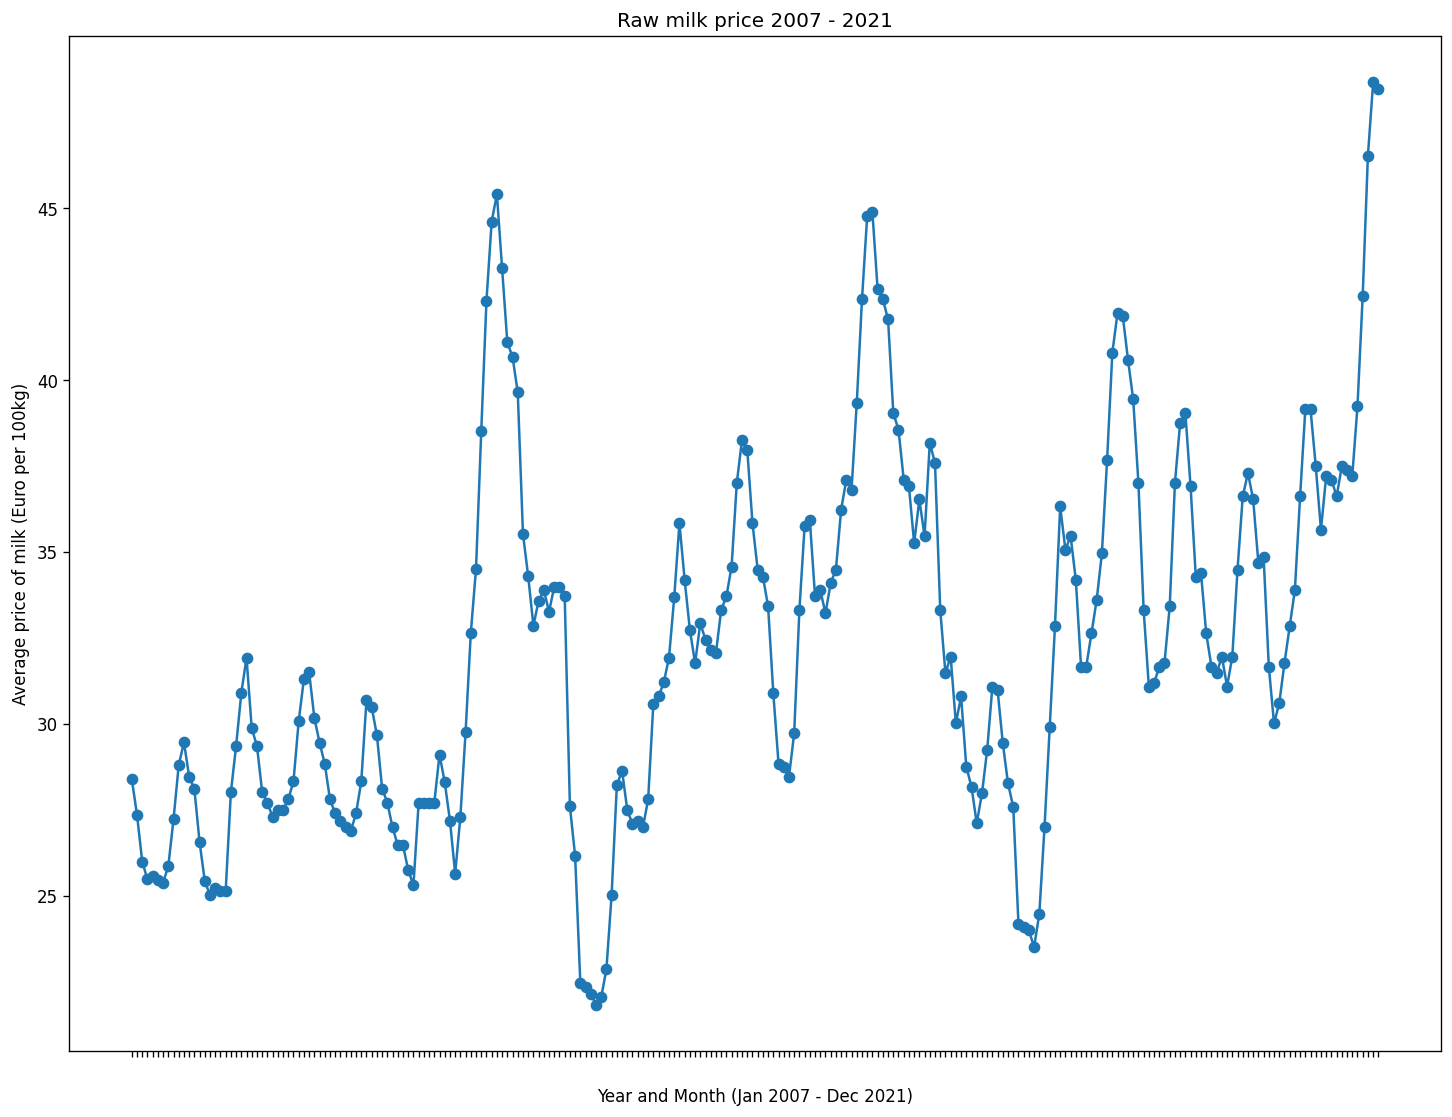

In [ ]:
df1['Date'] = df1['Year'].map(str)+ '-' +df1['Month'].map(str)
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m').dt.strftime('%Y-%m')


figure(figsize=(12, 9), dpi=120)

X = df1["Date"]
y = df1["Raw milk price"]

print(len(X), len(y))

plt.plot(X, y)
plt.scatter(X, y)
plt.tight_layout()
plt.xticks(color="None")
plt.title("Raw milk price 2007 - 2021")
plt.ylabel("Average price of milk (Euro per 100kg)")
plt.xlabel("Year and Month (Jan 2007 - Dec 2021)")
plt.show()

Text(0.5, 0, '')

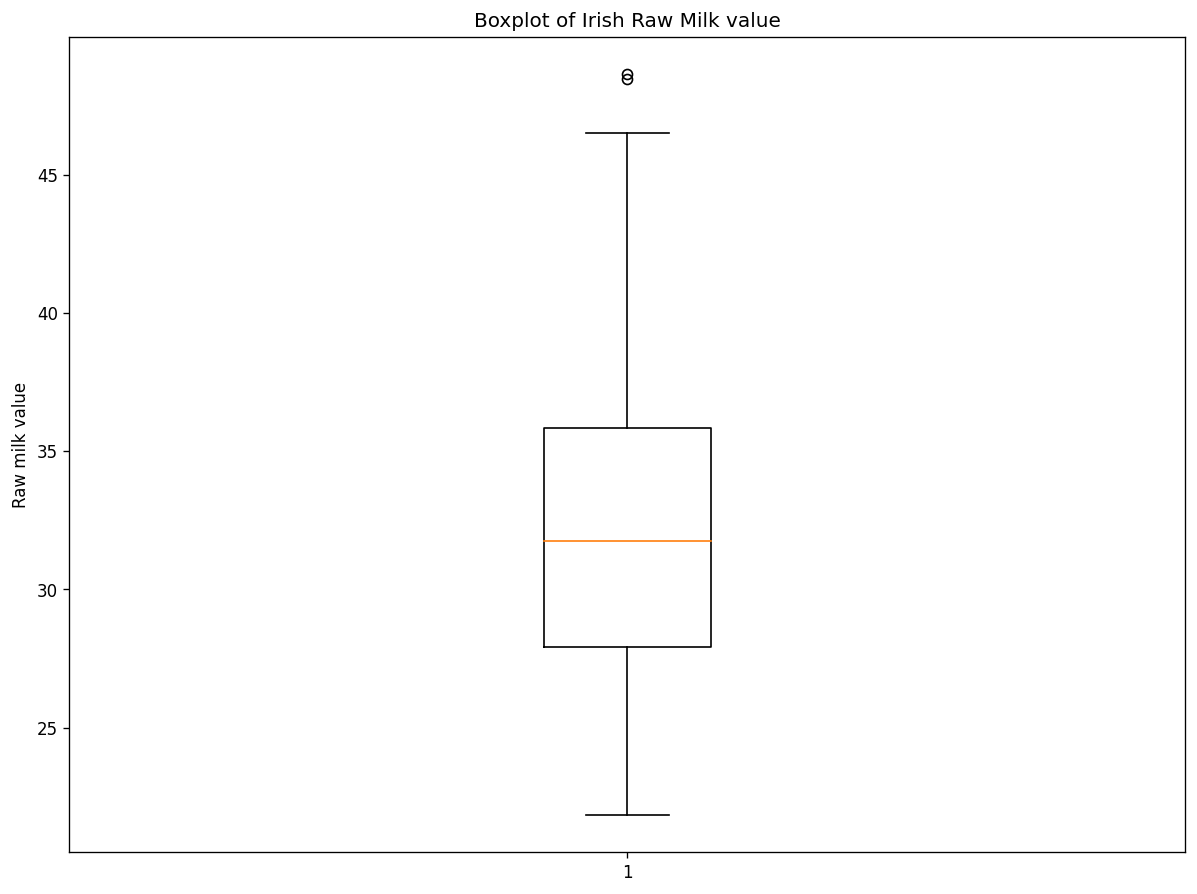

In [ ]:
figure(figsize=(12, 9), dpi=120)

y = df1["Raw milk price"]
plt.title("Boxplot of Irish Raw Milk value")
plt.boxplot(y)
plt.ylabel("Raw milk value")
plt.xlabel("")

Text(0.5, 1.0, 'Histogram of Raw milk price')

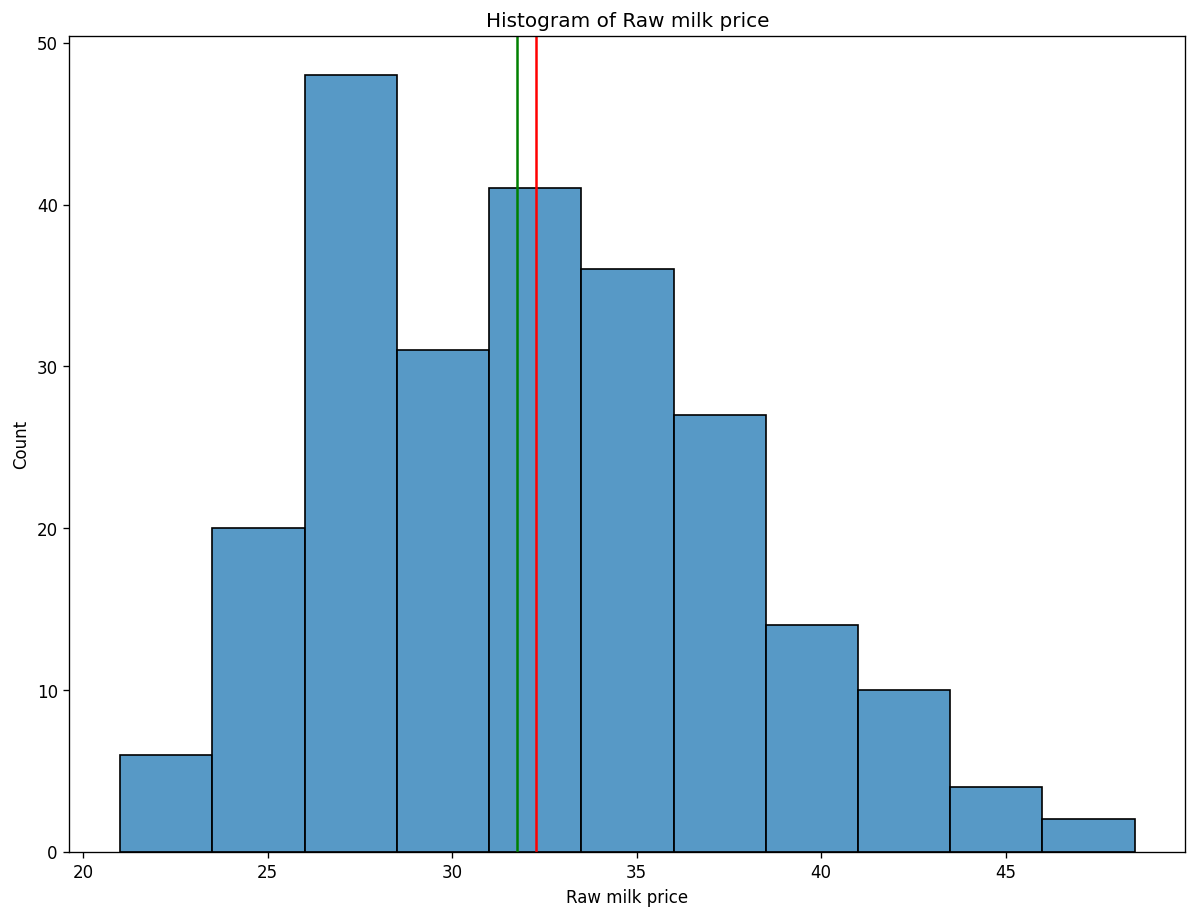

In [ ]:
binwidth = 2.5
xstart = math.floor(min(y))
xend = math.ceil(max(y))
bins = np.arange(xstart,xend,binwidth)

figure(figsize=(12, 9), dpi=120)

o = sns.histplot(data=y, bins = bins)
plt.axvline(x=y.mean(), color='red')
plt.axvline(x=y.median(), color='green')
o.set_title("Histogram of Raw milk price")

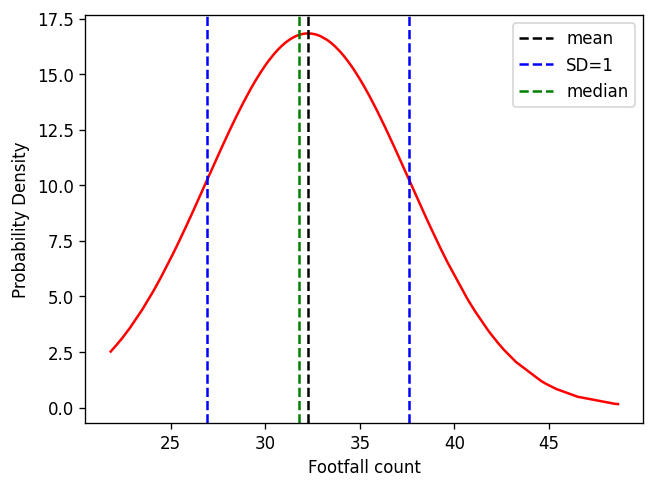

In [ ]:
# Importing required libraries

X = sorted(y)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(X)
sd = np.std(X)
median = np.median(X)

 
#Apply function to the data.
pdf = normal_dist(X,mean,sd)
 
#Plotting the Results
figure(figsize=(6, 4.5), dpi=120)

plt.plot(X, pdf , color = 'red')
ax = plt.gca()
ax.set_facecolor('white')
plt.axvline(mean, color="black", linestyle="--", label="mean")
plt.axvline(mean-sd, color="blue", linestyle="--", label="SD=1")
plt.axvline(median, color="green", linestyle="--", label="median")
plt.axvline(mean+sd, color="blue", linestyle="--")
plt.xlabel('Footfall')
plt.ylabel('Probability Density')
plt.legend()

240 240


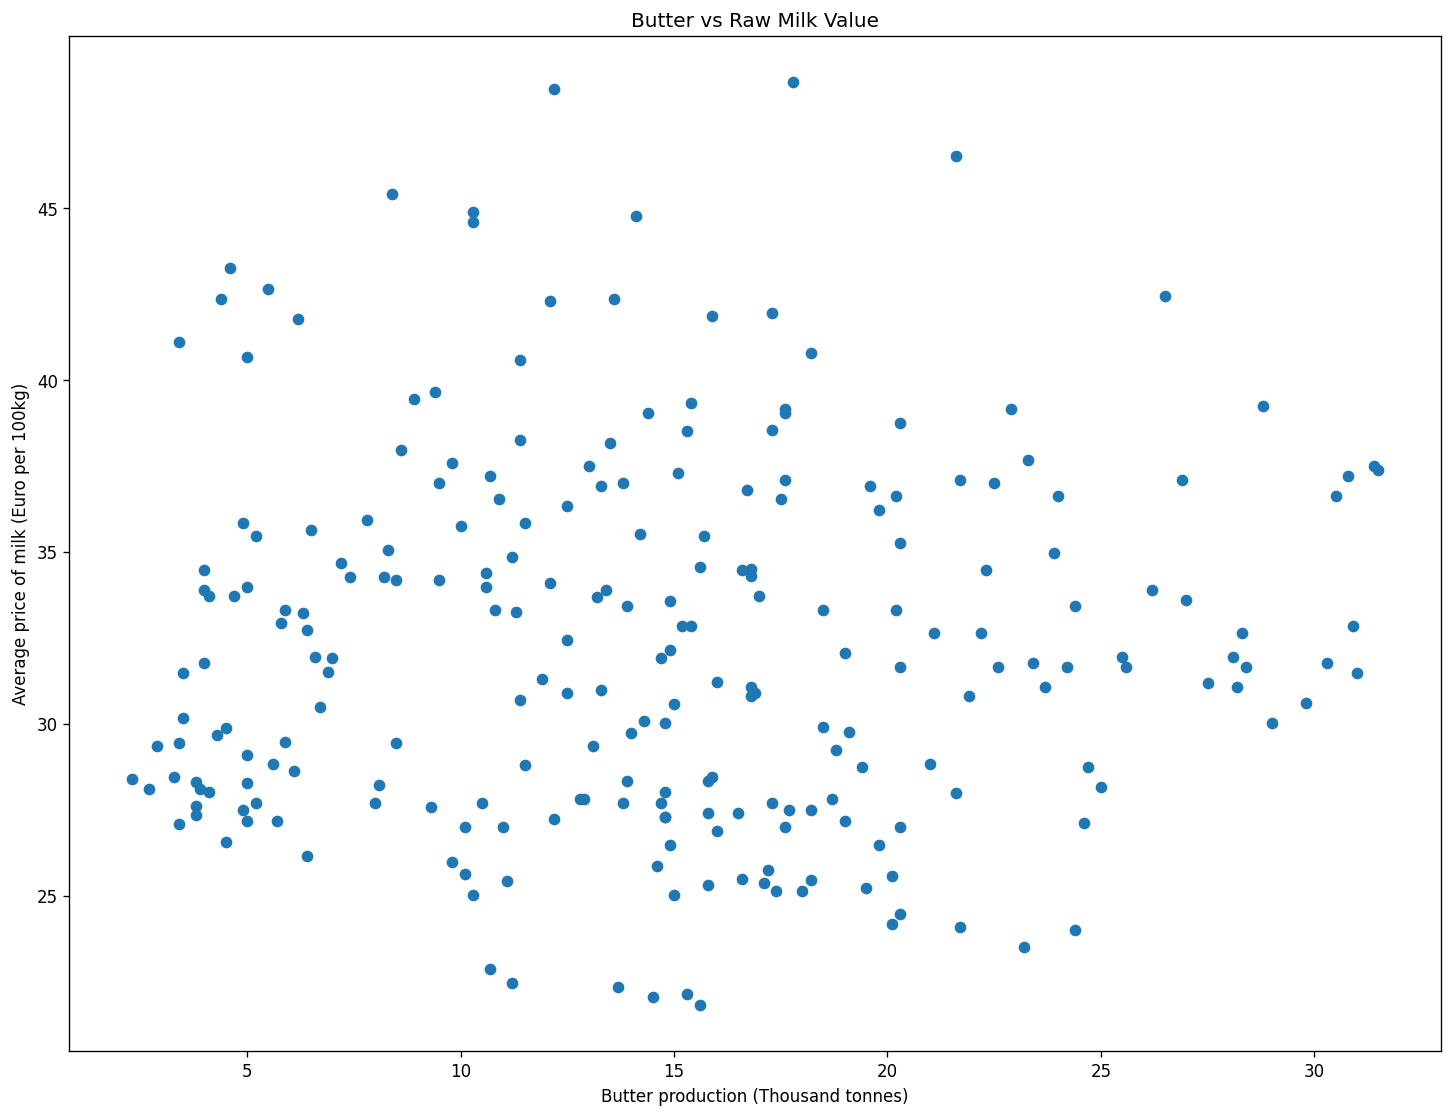

In [ ]:
figure(figsize=(12, 9), dpi=120)

X = df1["Butter"]
y = df1["Raw milk price"]

print(len(X), len(y))

plt.scatter(X, y)
plt.tight_layout()
plt.title("Butter vs Raw Milk Value")
plt.ylabel("Average price of milk (Euro per 100kg)")
plt.xlabel("Butter production (Thousand tonnes)")
plt.show()

240 240


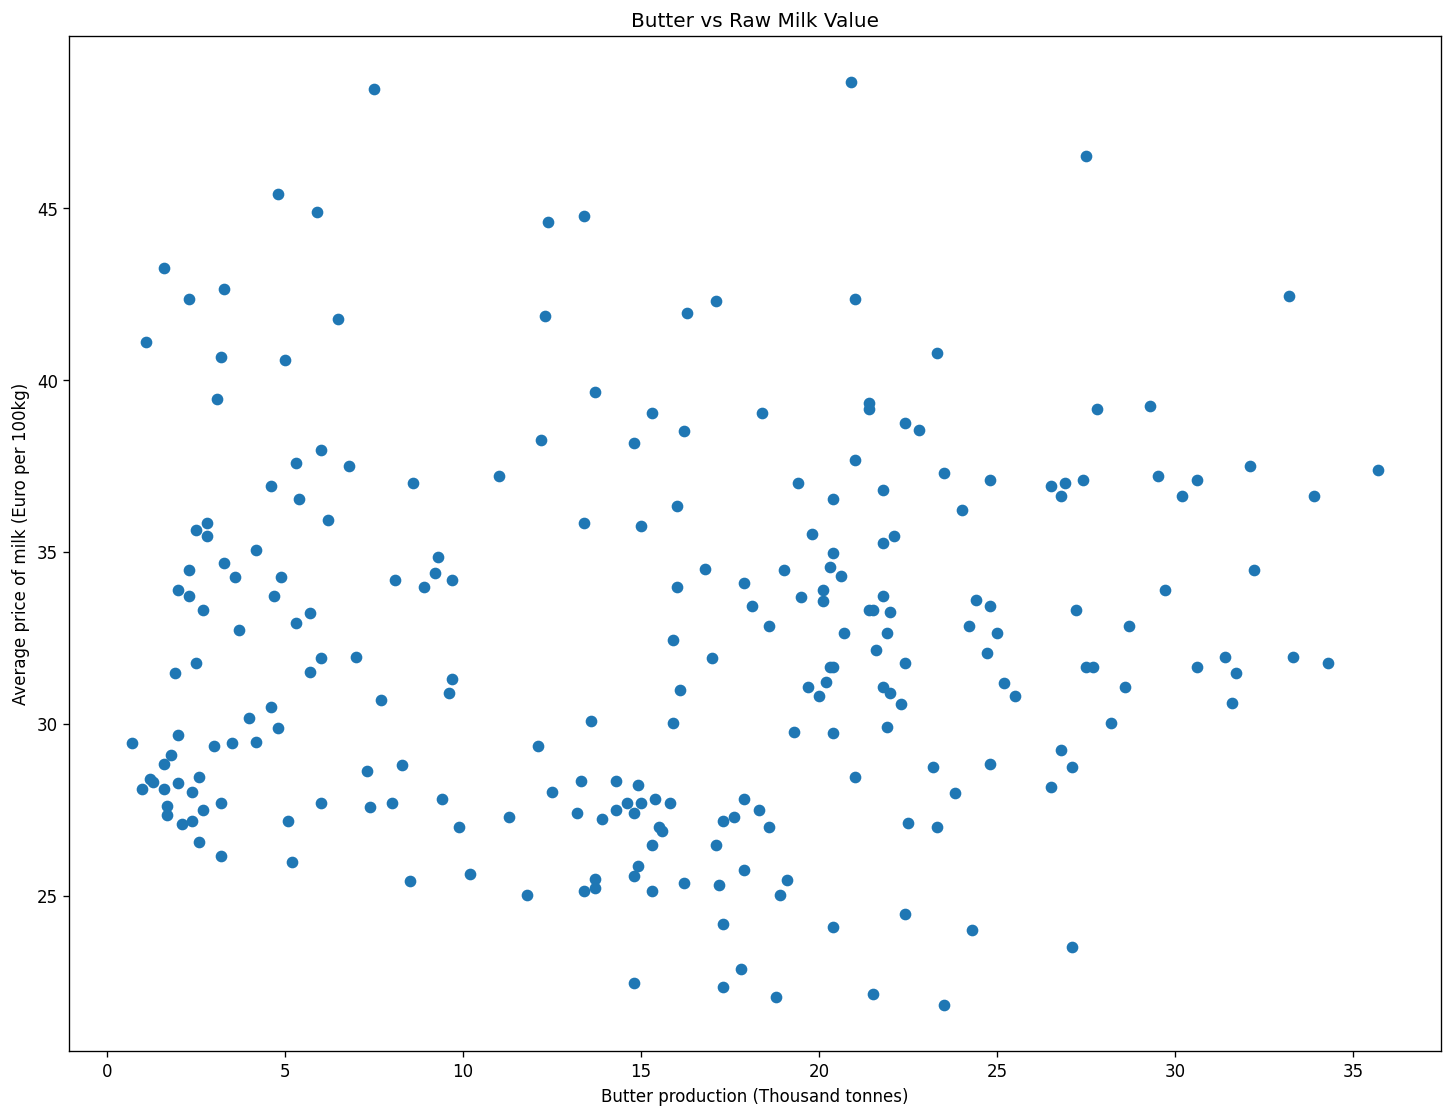

In [ ]:
figure(figsize=(12, 9), dpi=120)

X = df1["Cheese"]
y = df1["Raw milk price"]

print(len(X), len(y))

plt.scatter(X, y)
plt.tight_layout()
plt.title("Butter vs Raw Milk Value")
plt.ylabel("Average price of milk (Euro per 100kg)")
plt.xlabel("Butter production (Thousand tonnes)")
plt.show()

240 240


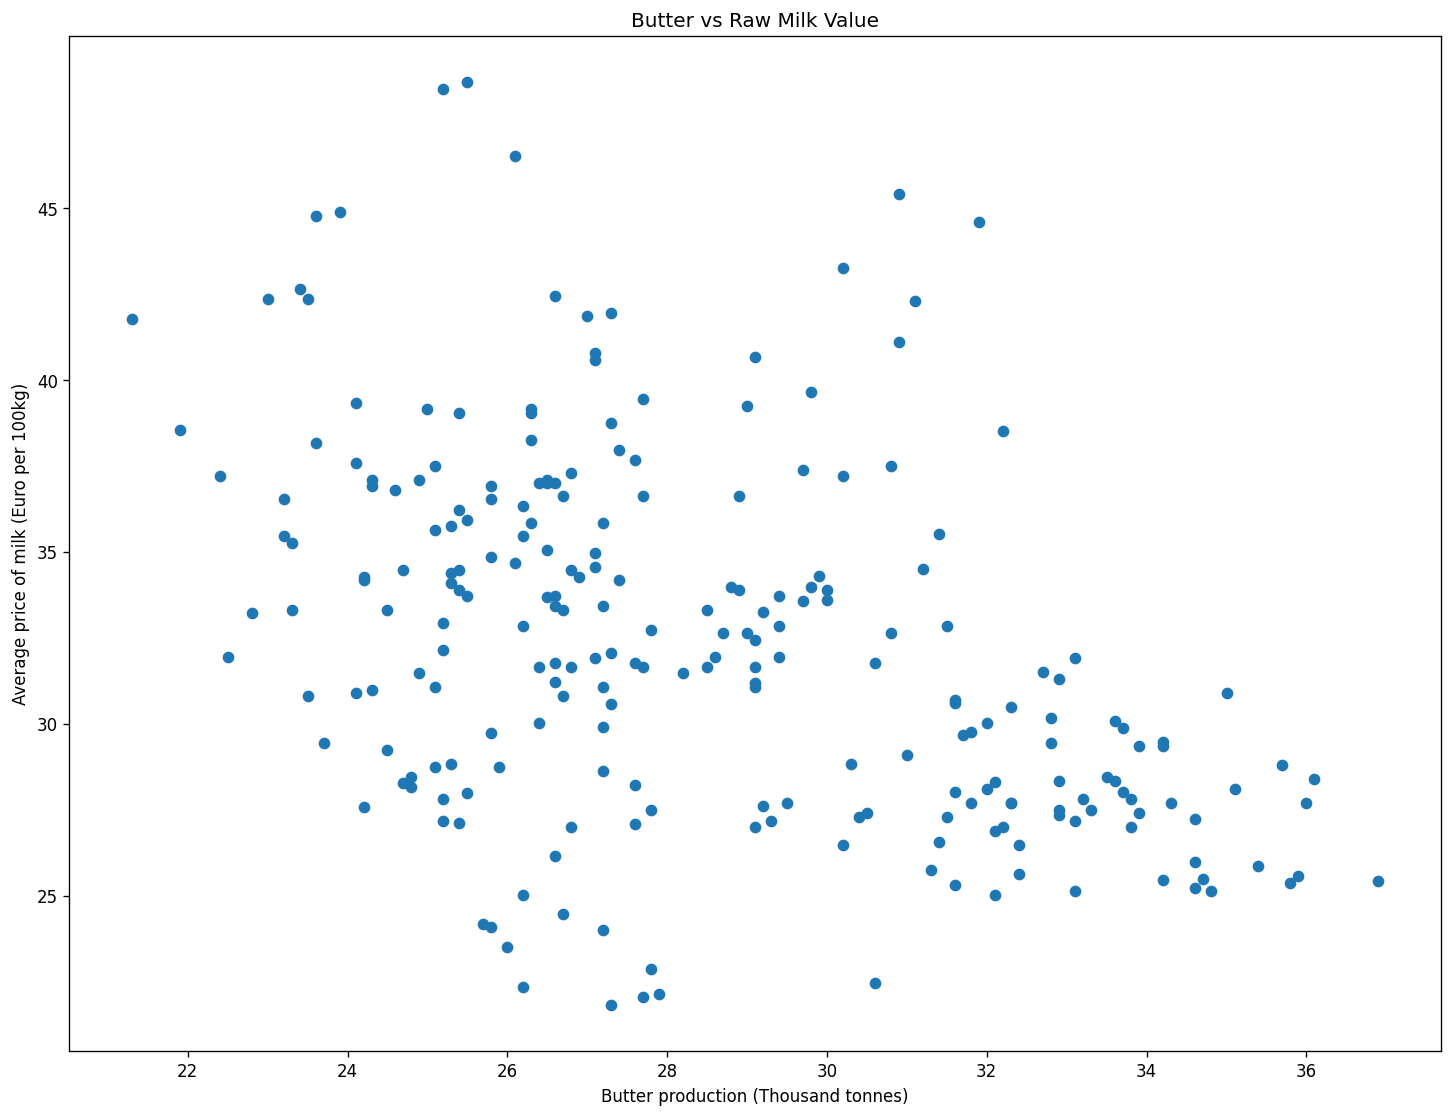

In [ ]:
figure(figsize=(12, 9), dpi=120)

X = df1["Whole milk sales"]
y = df1["Raw milk price"]

print(len(X), len(y))

plt.scatter(X, y)
plt.tight_layout()
plt.title("Butter vs Raw Milk Value")
plt.ylabel("Average price of milk (Euro per 100kg)")
plt.xlabel("Butter production (Thousand tonnes)")
plt.show()

In [ ]:
len(y)

240

## Calculation for normal distribution

In [ ]:
a = scipy.stats.zscore(y)
b = [math.ceil(x) for x in a if x > 0] + [math.floor(x) for x in a if x < 0] + [x*0 for x in a if x == 0]

In [ ]:
[math.ceil(x) for x in a if x > 0]

[1,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 4,
 4]

In [ ]:
set(b)

{-2, -1, 1, 2, 3, 4}

In [ ]:
from collections import Counter
Counter(b)

Counter({-2: 31, -1: 98, 1: 76, 2: 27, 3: 6, 4: 2})

In [ ]:
238/240

0.9916666666666667

In [ ]:
(124+43)/180

0.9277777777777778

In [ ]:
df_sorted = df1.sort_values(by="Raw milk price")

In [ ]:
df_sorted

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Imported milk intake,Skimmed milk sales,Skimmed milk powder,Whole milk sales
29,2009,6,21.83,15.6,23.5,617.5,3.65,319.82,411.62,490.06,582.91,661.43,0.0,13.3,10.2,27.3
30,2009,7,22.04,14.5,18.8,578.7,3.73,347.85,391.08,463.21,558.28,634.31,34.3,13.7,10.5,27.7
28,2009,5,22.14,15.3,21.5,647.7,3.65,343.63,415.53,492.93,572.39,644.96,33.9,13.6,10.7,27.9
27,2009,4,22.34,13.7,17.3,562.6,3.67,371.76,449.14,529.72,609.78,689.76,36.2,12.4,9.6,26.2
26,2009,3,22.45,11.2,14.8,417.9,3.81,391.19,472.91,536.85,616.22,683.99,39.1,15.1,3.2,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2013,11,44.87,10.3,5.9,276.4,4.48,532.12,553.83,639.59,741.64,860.79,32.4,16.6,0.0,23.9
10,2007,11,45.40,8.4,4.8,267.4,4.24,350.59,437.26,481.16,561.35,629.69,36.7,13.4,1.8,30.9
177,2021,10,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,0.0,15.8,5.5,26.1
179,2021,12,48.46,12.2,7.5,256.3,4.74,490.37,623.57,693.47,806.00,912.35,0.0,15.0,7.4,25.2


In [ ]:
df_sorted.head(20)

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Imported milk intake,Skimmed milk sales,Skimmed milk powder,Whole milk sales
29,2009,6,21.83,15.6,23.5,617.5,3.65,319.82,411.62,490.06,582.91,661.43,0.0,13.3,10.2,27.3
30,2009,7,22.04,14.5,18.8,578.7,3.73,347.85,391.08,463.21,558.28,634.31,34.3,13.7,10.5,27.7
28,2009,5,22.14,15.3,21.5,647.7,3.65,343.63,415.53,492.93,572.39,644.96,33.9,13.6,10.7,27.9
27,2009,4,22.34,13.7,17.3,562.6,3.67,371.76,449.14,529.72,609.78,689.76,36.2,12.4,9.6,26.2
26,2009,3,22.45,11.2,14.8,417.9,3.81,391.19,472.91,536.85,616.22,683.99,39.1,15.1,3.2,30.6
31,2009,8,22.86,10.7,17.8,505.8,3.85,351.04,361.81,456.61,542.18,614.92,33.1,13.9,7.9,27.8
113,2016,6,23.50,23.2,27.1,853.2,3.85,545.67,630.42,730.62,846.85,944.37,56.4,17.2,15.4,26.0
112,2016,5,23.99,24.4,24.3,929.6,3.81,552.83,655.24,746.20,843.51,959.81,94.7,18.2,24.2,27.2
111,2016,4,24.08,21.7,20.4,760.8,4.00,520.82,623.94,721.27,836.83,942.54,85.7,17.9,14.3,25.8
110,2016,3,24.18,20.1,17.3,594.6,4.15,576.89,659.61,744.15,857.49,962.65,84.6,18.2,8.8,25.7


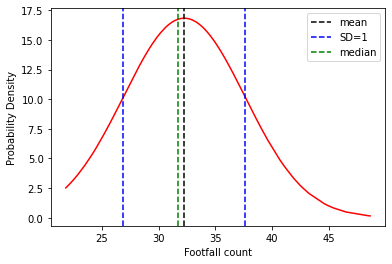

In [ ]:
# Importing required libraries

X = sorted(y)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(X)
sd = np.std(X)
median = np.median(X)

 
#Apply function to the data.
pdf = normal_dist(X,mean,sd)
 
#Plotting the Results

plt.plot(X, pdf , color = 'red')
ax = plt.gca()
ax.set_facecolor('white')
plt.axvline(mean, color="black", linestyle="--", label="mean")
plt.axvline(mean-sd, color="blue", linestyle="--", label="SD=1")
plt.axvline(median, color="green", linestyle="--", label="median")
plt.axvline(mean+sd, color="blue", linestyle="--")
plt.xlabel('Footfall count')
plt.ylabel('Probability Density')
plt.legend()

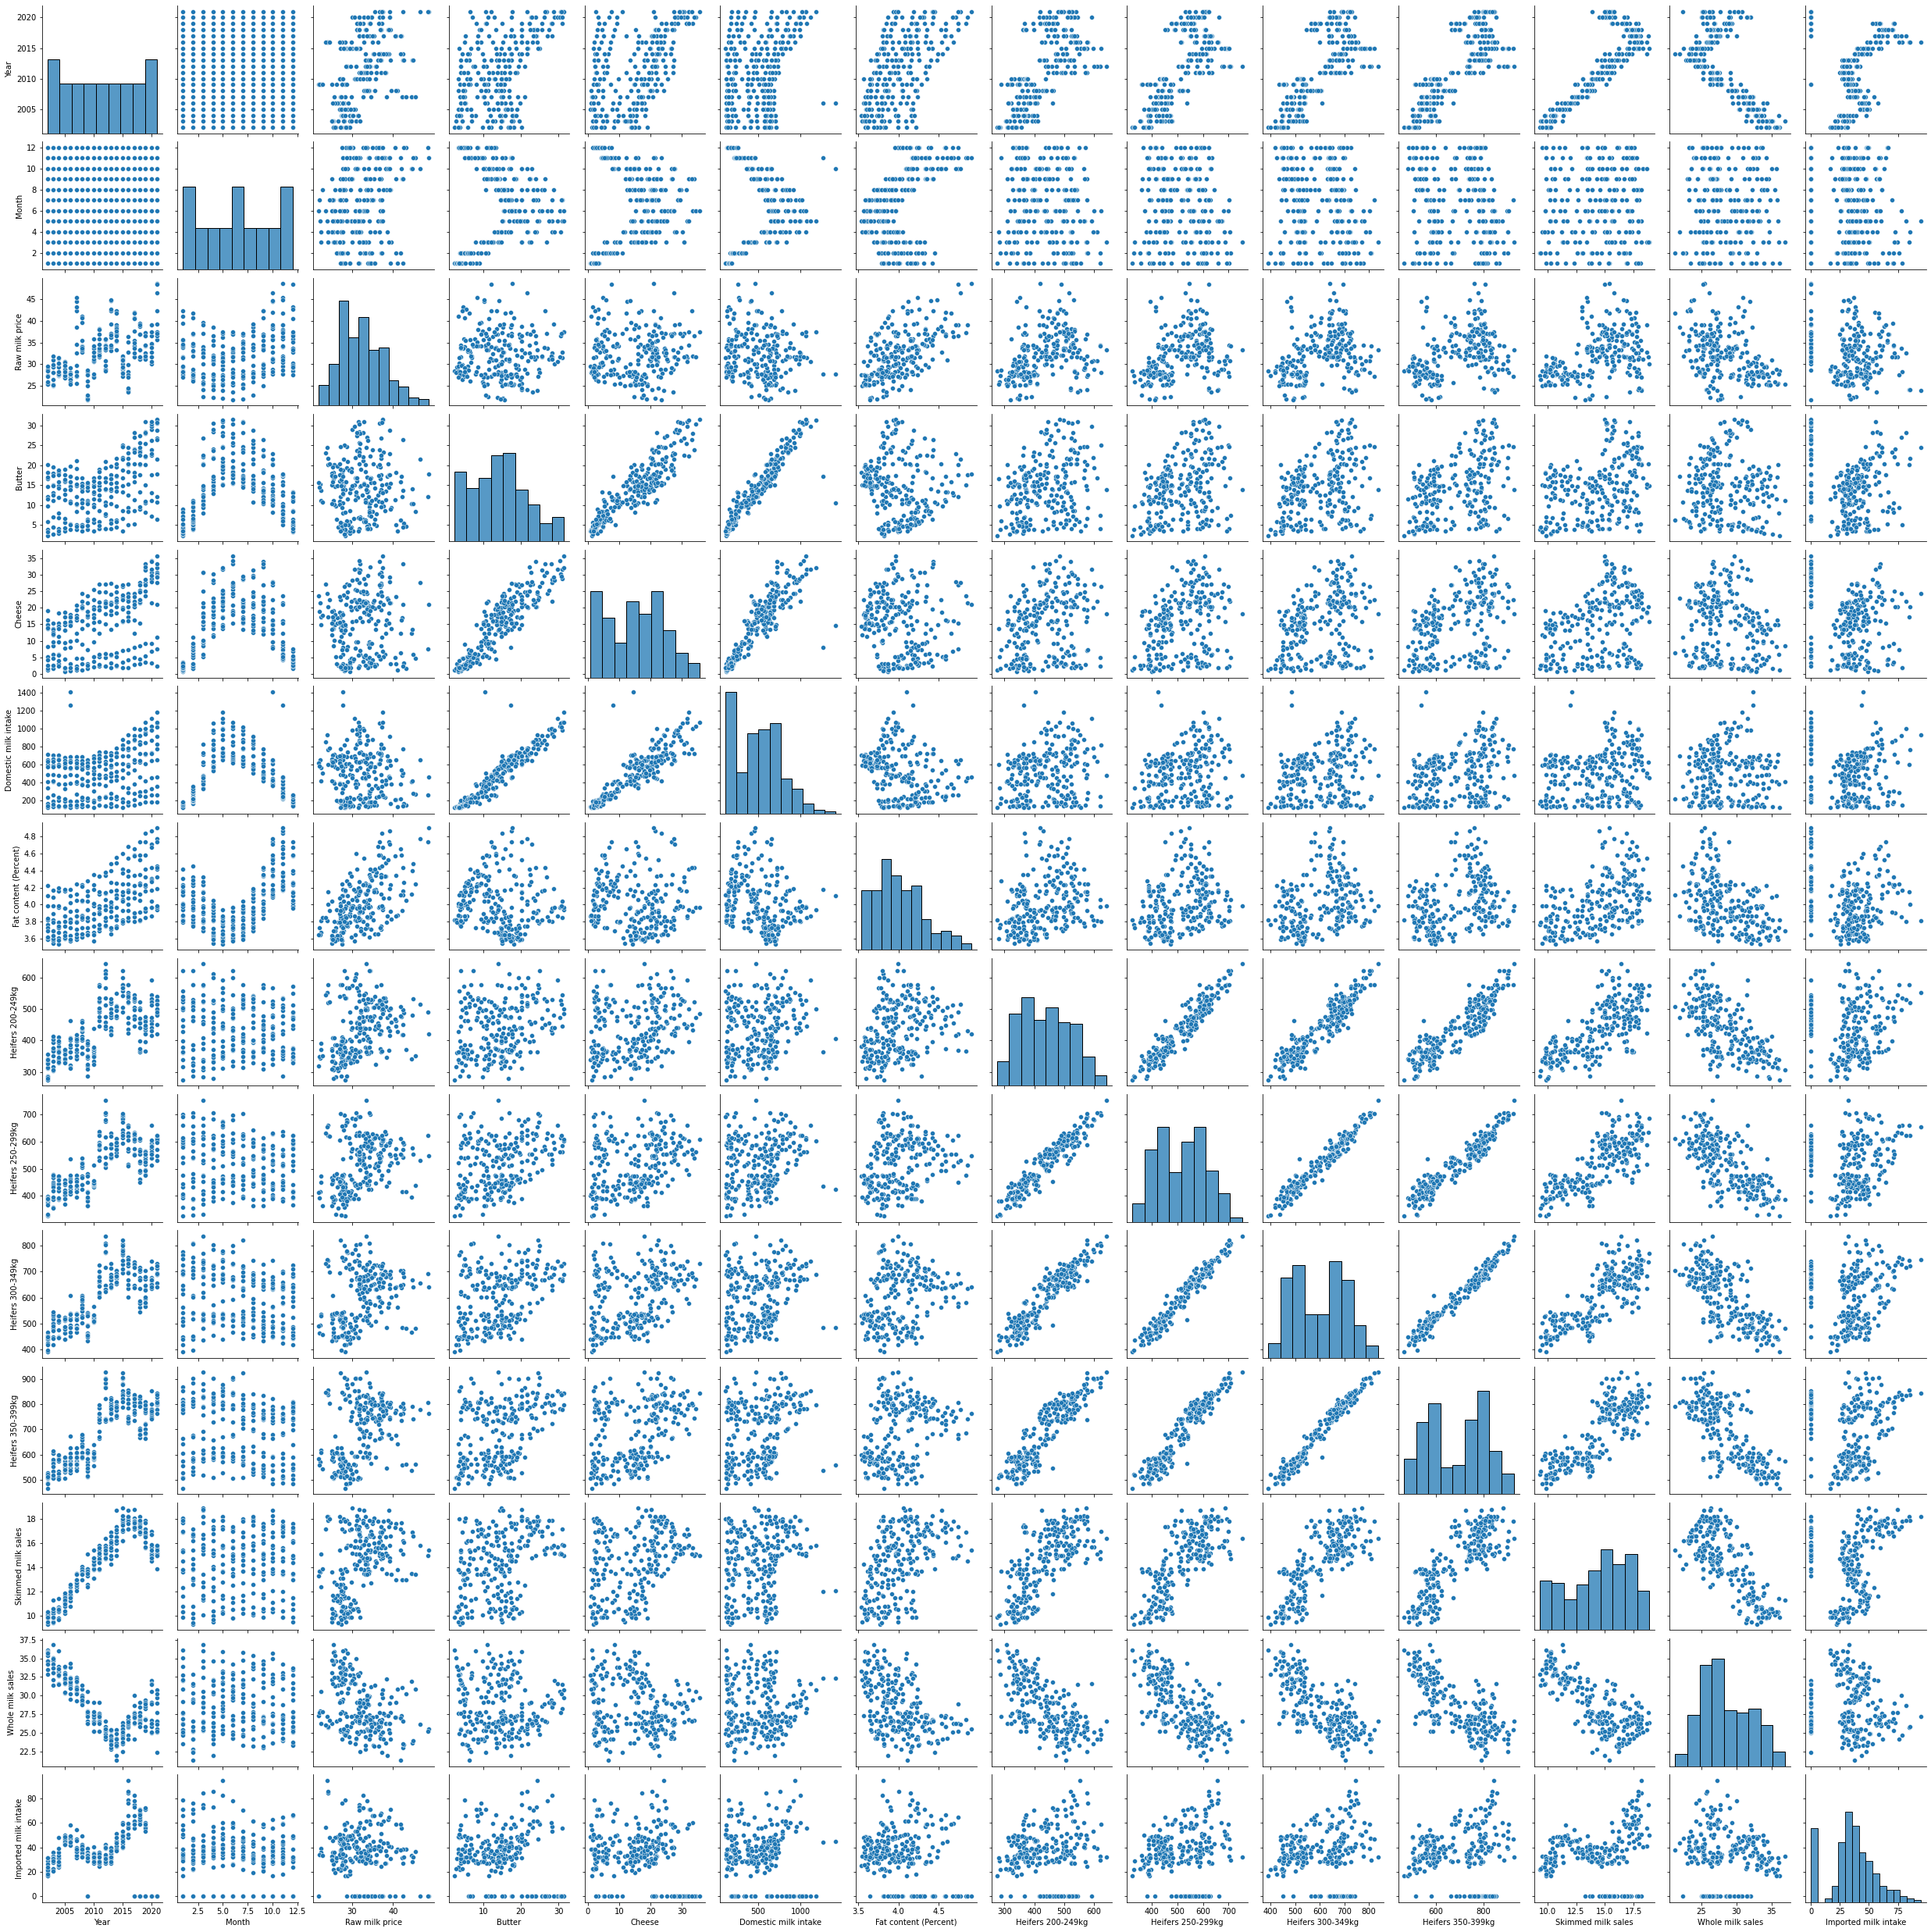

In [ ]:
sns.pairplot(df1)

# Testing between values

## Import extra datasets for comparison

In [ ]:
xlsx = pd.ExcelFile(cwd+"milk_dataset V2.xlsx")

In [ ]:
df4 = pd.read_excel(xlsx, "Average value of raw milk")

## Add extra features to Ireland dataset for comparison

In [ ]:
df1["Volume"] = [x+y for (x,y) in zip(df1["Domestic milk intake"],
                                      df1["Imported milk intake"])]

In [ ]:
df1["Concentrated milk"] = [x+y for (x,y) in zip(df1["Whole milk sales"],
                                                 df1["Skimmed milk sales"])]

IndentationError: ignored

## Tests

### First test: Irish Raw Milk Value vs Netherlands Raw Milk Value

In [ ]:
X1 = df1["Raw milk price"]
y1 = dfn["Raw milk value"]

Test if data for both is apporiximately normal

In [ ]:
from scipy.stats import shapiro

In [ ]:
stats, p = shapiro(X1)

In [ ]:
p

0.0004901557695120573

Not Gaussian

In [ ]:
stats2, p2 = shapiro(y1)

In [ ]:
p2

0.02008172497153282

Not Gaussian

As both sets are non-Gaussian distributions, the tests we will perform are 

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

For Pytthon, the reverse of the standard Mann Whitney assertion is applied: if the p-value generated from the tests is >.05, we reject H0, otherwise we accept it.

In [ ]:
scipy.stats.mannwhitneyu(y1, X1)

MannwhitneyuResult(statistic=33197.5, pvalue=0.0038058964062768585)

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk (e.g. the overall distribution between Irish raw milk values and Dutch values is at the same rate)<br>
H1: There is a difference

In [ ]:
png.mwu(X1, y1)

,U-val,alternative,p-val,RBC,CLES
MWU,24402.5,two-sided,0.003806,0.152691,0.423655


In [ ]:
png.wilcoxon(X1, y1)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,302.0,two-sided,1.715594e-39,-0.979115,0.070174


As the p-value of the comparison is less than .05, at a level of 95% significant, we reject the hypothesis

### Second test: Irish Milk Intake vs Netherlands Milk Intake

In [ ]:
df1["Volume"] = [x+y for (x,y) in zip(df1["Domestic milk intake"],
                                      df1["Imported milk intake"])]

In [ ]:
df1

,Year,Month,Raw milk price,Butter,Cheese,Domestic milk intake,Fat content (Percent),Heifers 200-249kg,Heifers 250-299kg,Heifers 300-349kg,Heifers 350-399kg,Heifers 400-449kg,Skimmed milk sales,Skimmed milk powder,Whole milk sales,Imported milk intake,Volume
0,2002.0,1.0,28.39,2.3,1.2,117.3,3.82,274.71,325.25,390.32,467.19,559.87,9.9,3.1000,36.1,16.8,134.1
1,2002.0,2.0,27.35,3.8,1.7,165.2,3.77,286.94,328.66,398.31,522.77,576.65,9.3,2.9000,32.9,21.9,187.1
2,2002.0,3.0,25.99,9.8,5.2,337.5,3.73,283.65,332.73,437.81,519.85,566.68,10.1,5.3000,34.6,29.2,366.7
3,2002.0,4.0,25.47,16.6,13.7,596.4,3.60,279.94,380.13,455.14,510.17,589.39,10.0,8.9000,34.7,31.2,627.6
4,2002.0,5.0,25.57,20.1,14.8,709.0,3.59,310.74,388.89,440.45,528.76,569.65,10.3,11.8000,35.9,31.6,740.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.0,8.0,39.23,28.8,29.3,917.4,4.19,480.00,598.07,689.20,801.61,913.59,15.8,16.4000,29.0,0.0,917.4
236,2021.0,9.0,42.44,26.5,33.2,776.7,4.43,450.74,570.54,694.88,804.71,915.68,15.1,11.1000,26.6,0.0,776.7
237,2021.0,10.0,46.52,21.6,27.5,652.8,4.77,516.00,529.67,656.53,777.37,890.95,15.8,5.5000,26.1,0.0,652.8
238,2021.0,11.0,48.65,17.8,20.9,460.6,4.90,419.66,547.42,641.39,762.83,888.34,15.4,5.2625,25.5,0.0,460.6


In [ ]:
X2 = df1["Volume"]
y2 = dfn["Volume"]

Test if data for both is apporiximately normal

In [ ]:
from scipy.stats import shapiro

In [ ]:
stats, p = shapiro(X2)

In [ ]:
p

2.932757979579037e-06

Not Gaussian

In [ ]:
stats2, p2 = shapiro(y2)

In [ ]:
p2

2.194160408919288e-08

Not Gaussian

As both sets are non-Gaussian distributions, the tests we will perform are 

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

For Pytthon, the reverse of the standard Mann Whitney assertion is applied: if the p-value generated from the tests is >.05, we reject H0, otherwise we accept it.

In [ ]:
scipy.stats.mannwhitneyu(y2, X2)

MannwhitneyuResult(statistic=53558.0, pvalue=1.098121292199009e-59)

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

In [ ]:
png.mwu(y2, X2)

,U-val,alternative,p-val,RBC,CLES
MWU,53558.0,two-sided,1.098121e-59,-0.859653,0.929826


In [ ]:
png.mwu(y2, X2, alternative="less")

,U-val,alternative,p-val,RBC,CLES
MWU,53558.0,less,1.0,-0.859653,0.070174


As the p-value of the comparison is less than .05, at a level of 95% significant, we reject the hypothesis

### Test 3: Irish Fat content average vs Netherlands Fat content average

In [ ]:
X3 = df1["Fat content (Percent)"]
y3 = dfn["Fat content"]

Test if data for both is apporiximately normal

In [ ]:
stats, p = shapiro(X3)

In [ ]:
p

9.078539733309299e-07

Not Gaussian

In [ ]:
stats2, p2 = shapiro(y3)

In [ ]:
p2

5.093739652295426e-09

Gaussian

As not both distributions follow a Gaussian distribution, we will use the Mann-Whitney U test to confirm

H0: There is no statistical difference between the valuation of Fat content observed on average in Irish raw milk vs the fat content of Dutch raw milk
H1: There is a difference

For Pytthon, the reverse of the standard Mann Whitney assertion is applied: if the p-value generated from the tests is <=.05, we reject H0, otherwise we accept it.

In [ ]:
scipy.stats.mannwhitneyu(y3, X3)

MannwhitneyuResult(statistic=49728.0, pvalue=3.642029525034567e-43)

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

In [ ]:
png.mwu(y3, X3)

,U-val,alternative,p-val,RBC,CLES
MWU,49728.0,two-sided,3.642030e-43,-0.726667,0.863333


In [ ]:
png.mwu(y3, X3, alternative="less")

,U-val,alternative,p-val,RBC,CLES
MWU,49728.0,less,1.0,-0.726667,0.136667


As the p-value of the comparison is less than .05, at a level of 95% significant, we reject the hypothesis

### Test 4: Irieland Milk value vs Germany Milk Value 

In [ ]:
X4 = df4["Ireland"]
y4 = df4["Germany"]

Test if data for both is apporiximately normal

In [ ]:
stats, p = shapiro(X4)

In [ ]:
p

0.0004901557695120573

Not Gaussian

In [ ]:
stats2, p2 = shapiro(y5)

In [ ]:
p2

0.024152131751179695

Gaussian

As not both distributions follow a Gaussian distribution, we will use the Mann-Whitney U test to confirm

H0: There is no statistical difference between the valuation of Irish raw milk and German raw milk<br>
H1: There is a difference

In [ ]:
scipy.stats.mannwhitneyu(X5, y5)

MannwhitneyuResult(statistic=28337.0, pvalue=0.7608355886991318)

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

In [ ]:
png.mwu(X5, y5)

,U-val,alternative,p-val,RBC,CLES
MWU,28337.0,two-sided,0.760836,0.016076,0.491962


In [ ]:
png.mwu(y5, X5, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,29263.0,greater,0.380418,-0.016076,0.508038


As the p-value of the comparison is greater than .05, we can determine that there is no evidence to suggest that there is enough external factors that either country encountered to the other than would suggest the countries have suffered the same setbacks and had the same benefits

### Test 5: Irish Raw milk value vs Spanish Raw Milk Value

In [ ]:
X5 = df4["Ireland"]
y5 = df4["Spain"]

Test if data for both is apporiximately normal

In [ ]:
stats, p = shapiro(X5)

In [ ]:
p

0.0004901557695120573

Not Gaussian

In [ ]:
stats2, p2 = shapiro(y5)

In [ ]:
p2

5.63147102124943e-15

Not Gaussian

As not both distributions follow a Gaussian distribution, we will use the Mann-Whitney U test to confirm

H0: There is difference between the valuation of Irish raw milk and Spanish raw milk<br>
H1: There is a difference

For Pytthon, the reverse of the standard Mann Whitney assertion is applied: if the p-value generated from the tests is <=.05, we reject H0, otherwise we accept it.

In [ ]:
scipy.stats.mannwhitneyu(y5, X5)

MannwhitneyuResult(statistic=27120.0, pvalue=0.2690169403043843)

H0: There is no statistical difference between the valuation of Irish raw milk and Dutch raw milk<br>
H1: There is a difference

In [ ]:
png.mwu(y5, X5)

,U-val,alternative,p-val,RBC,CLES
MWU,27120.0,two-sided,0.269017,0.058333,0.470833


In [ ]:
png.mwu(y5, X5, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,27120.0,greater,0.865634,0.058333,0.470833


As the p-value of the comparison is less than .05, at a level of 95% significant, we reject the hypothesis

### Test 6: Irish Raw milk value vs Spanish Raw Milk Value vs Netherlands Raw Milk Value

In [ ]:
X6 = df4["Ireland"]
y6 = df4["Spain"]
z6 = df4["Netherlands"]

As we already know this data does not conform to Gaussian distributions, we do not need to test

H0: There is difference between the valuation of Irish raw milk and Spanish raw milk<br>
H1: There is a difference

For Pytthon, the reverse of the standard Mann Whitney assertion is applied: if the p-value generated from the tests is <=.05, we reject H0, otherwise we accept it.

In [ ]:
scipy.stats.kruskal(X6, y6, z6)

KruskalResult(statistic=24.502236065235063, pvalue=4.7797704643826725e-06)

As the p-value of the comparison is less than .05, at a level of 95% significant, we reject the hypothesis